In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

import re
import string

In [2]:
df = pd.read_json("fenerbahce_beko_news_cleaned.json", lines=True)
df.head()

,title,text,date,clean_text
0,"Final Four Üçüncülük Maçında Fenerbahçe Beko, ...",by Eurohoops Team /info@eurohoops.net\nEurohoo...,25/May/24 22:13,turkish airlines euroleague 2023-24 sezonu fin...
1,Nate Sestina: “Şampiyon Olamadık Fakat Başımız...,by Bilal Baran Yardımcı /info@eurohoops.net\nE...,25/May/24 20:39,turkish airlines euroleague de final four yarı...
2,Nigel Hayes-Davis: “Üçüncülük Maçı mı? Avrupa’...,by Bilal Baran Yardımcı /info@eurohoops.net\nE...,25/May/24 19:03,turkish airlines euroleague final four unun ya...
3,Saras Jasikevicius’tan Eurohoops’a: “Üçüncülük...,by Alex Molina /info@eurohoops.net\nEurohoops ...,25/May/24 17:49,turkish airlines euroleague final four unun ya...
4,EuroLeague Final Four: Tarihin En Farklı Biten...,by Utkan Şahin /info@eurohoops.net\nFinal Four...,25/May/24 08:52,"final four, basketbolun bambaşka bir düzeyi. b..."


In [3]:
# Noktalama işaretleri
punct = string.punctuation

df["clean_text"] = df["clean_text"].apply(
    lambda x: re.sub(f"[{re.escape(punct)}]", " ", x)
)

df["clean_text"] = df["clean_text"].str.replace(r"\s+", " ", regex=True).str.strip()

In [4]:
# Türkçe stop words
stop_words = set(stopwords.words("turkish"))

words = [
    w for w in " ".join(df["clean_text"]).split()
    if w not in stop_words
]

word_counts = Counter(words)

# En çok geçen 20 kelime
word_counts.most_common(20)

[('bir', 38983),
 ('fenerbahçe', 17630),
 ('i', 16237),
 ('euroleague', 15684),
 ('iyi', 12080),
 ('sayı', 12063),
 ('son', 10505),
 ('in', 9318),
 ('maç', 7992),
 ('ilk', 7695),
 ('2', 7536),
 ('sezon', 7142),
 ('takım', 7015),
 ('3', 6920),
 ('5', 6497),
 ('basketbol', 6041),
 ('1', 5968),
 ('oldu', 5948),
 ('olarak', 5769),
 ('iki', 5677)]

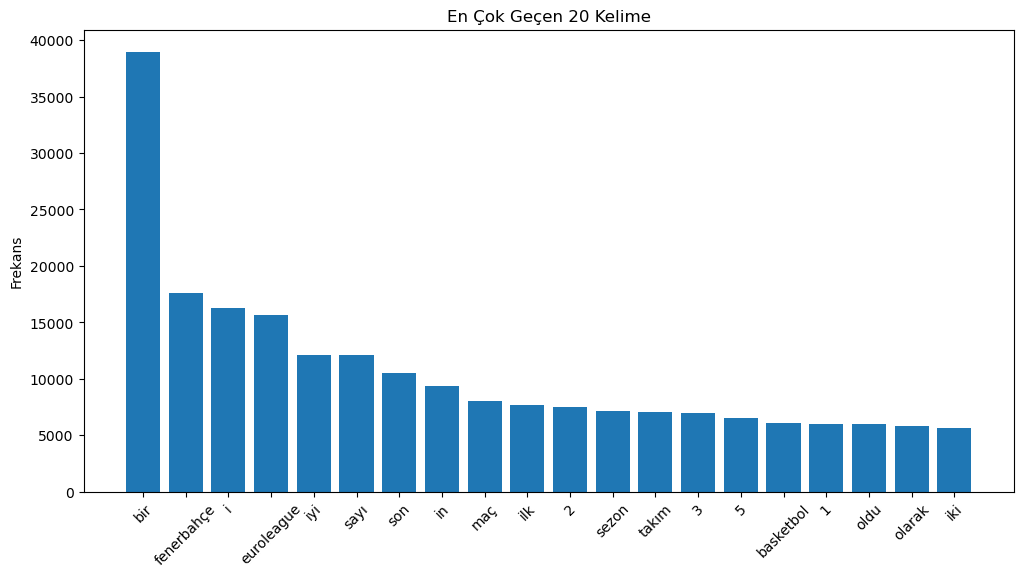

In [5]:
all_words = [
    w for w in " ".join(df["clean_text"]).split()
    if w not in stop_words
]

word_counts = Counter(all_words)
top20_words = word_counts.most_common(20)

words, counts = zip(*top20_words)

plt.figure(figsize=(12,6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title("En Çok Geçen 20 Kelime")
plt.ylabel("Frekans")
plt.show()

In [6]:
# Stopwords seti
sw = set(stopwords.words("turkish"))

all_words_with_stopwords = " ".join(df["clean_text"]).split()

stop_in_text = [w for w in all_words_with_stopwords if w in sw]

stop_counter = Counter(stop_in_text)

# En çok geçen 20 stopwords
stop_counter.most_common(20)

[('ve', 34862),
 ('bu', 26353),
 ('de', 24549),
 ('da', 23597),
 ('çok', 19769),
 ('için', 14337),
 ('en', 10834),
 ('daha', 10393),
 ('ile', 9682),
 ('ise', 7237),
 ('her', 6620),
 ('ama', 5918),
 ('şu', 4736),
 ('gibi', 4205),
 ('o', 4138),
 ('kez', 3636),
 ('ki', 3427),
 ('ne', 2867),
 ('ya', 2724),
 ('şey', 2700)]

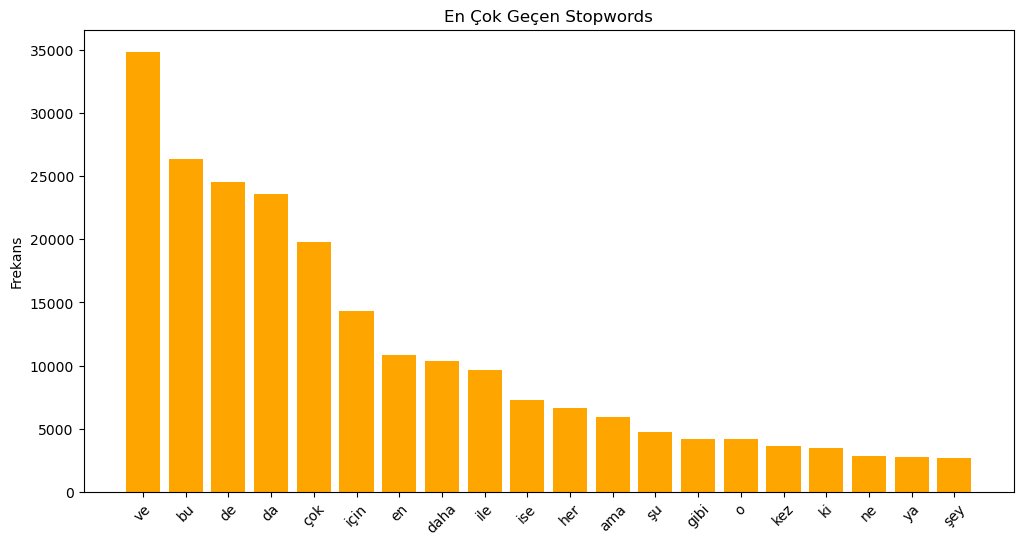

In [7]:
stop_words_tr = set(stopwords.words("turkish"))

all_words_with_stopwords = " ".join(df["clean_text"]).split()

stopword_list = [w for w in all_words_with_stopwords if w in stop_words_tr]

stopword_counts = Counter(stopword_list)
top20_stopwords = stopword_counts.most_common(20)

sw_words, sw_counts = zip(*top20_stopwords)
plt.figure(figsize=(12,6))
plt.bar(sw_words, sw_counts, color='orange')
plt.xticks(rotation=45)
plt.title("En Çok Geçen Stopwords")
plt.ylabel("Frekans")
plt.show()

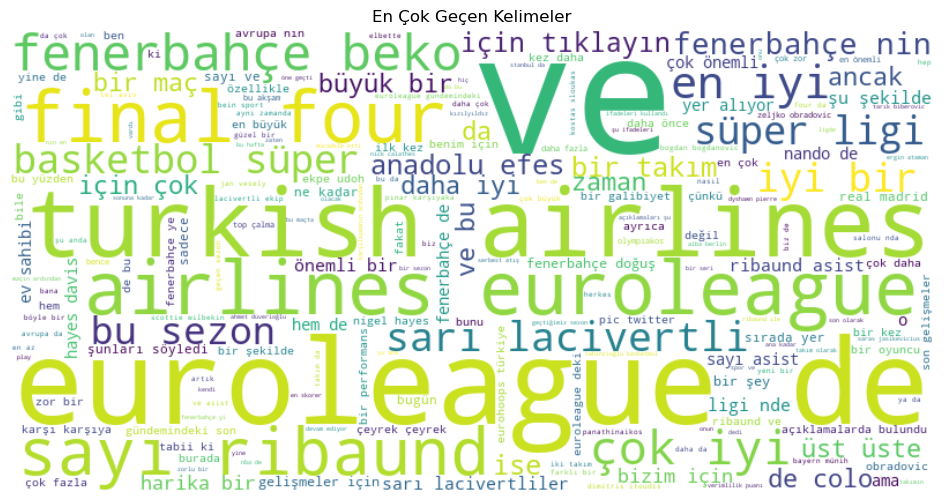

In [8]:
# !pip install wordcloud

text = " ".join(df["clean_text"])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("En Çok Geçen Kelimeler")
plt.show()

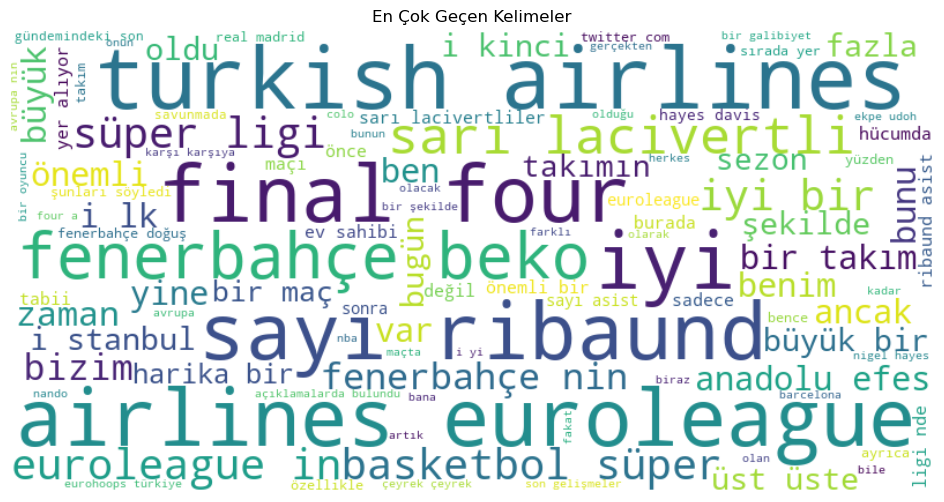

In [9]:
stop_words_tr = set(stopwords.words("turkish"))

text = " ".join(df["clean_text"])

wc = WordCloud(width=800, height=400,
               background_color="white",
               max_words=100,
               stopwords=stop_words_tr,
               colormap="viridis").generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("En Çok Geçen Kelimeler")
plt.show()